In [1]:
import numpy as np
from scipy import signal as sg
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import sounddevice as sd

1 .  GENERACIÓN Y MUESTREO DE SEÑALES
----------

En esta sección generaremos algunas señales digitales y veremos el efecto del muestreo en términos de reconstrucción. Finalmente veremos cómo generar señales de audio y guardarlas en formato .wav.

1.1 Generación de señales
---

Generaremos muestras a partir de la siguiente señal contínua:

$$ x(t) = sin(2\pi f_{0}t) + cos(2\pi f_{1}t) $$

Donde: $f_{0} = 2Hz$ y $f_{1}=3f_{0}$

a) Implemente una función def x(t) que devuelve los valores de x(t) de una lista de valores en formato numpy.

In [2]:
#Comenzamos definiendo las constantes dadas
f0 = 2
f1 = 3*f0

#Luego, se define la función pedida

def x(t):
    return np.sin(2*np.pi*2*t) + np.cos(2*np.pi*6*t)

b) Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s_{0}} = 1000Hz$ sobre $N_{0} = 1024$ muestras.

b.1.- Genere un arreglo $t_{0}$ de N muestras temporales de valores $t = \frac{n}{f_{s_{0}}}$.

b.2.- Evalue la función x en el vector de tiempo $t_{0}$ y almacene los valores resultantes $x[n]$ en un vector $x_{0}$.

b.3.- Trace la señal con el eje de tiempo correcto en segundos.

Text(0.5, 0, '$t_{0}$')

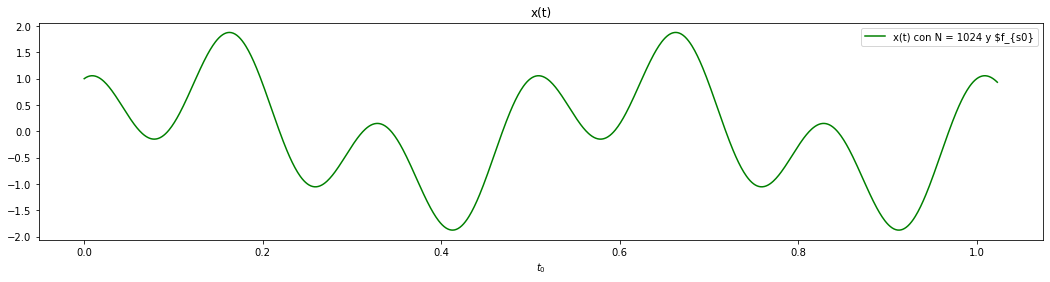

In [3]:
# Nombramos N equivalente a 1024
N = 2**10

# Nombramos fs0
fs0 = 1000

# Definimos los rangos de t0

t0 = np.arange(0, N/fs0, 1/fs0)

# Evaluamos en t_{0}

x0 = x(t0)

# Generamos la gráfica

fig, ax = plt.subplots(1, figsize = (18,4))
ax.plot(t0, x0, 'g-', label = 'x(t) con N = 1024 y $f_{s0}')
ax.legend()
ax.set_title('x(t)')
ax.set_xlabel('$t_{0}$')

c) Genere una señal $x_{n}$ con una frecuencia de muestreo $f_{s} = 20$ sobre $N = f_{s}$ muestras (muestreos de 1 segundo).

Text(0.5, 0, '$t_{0}$')

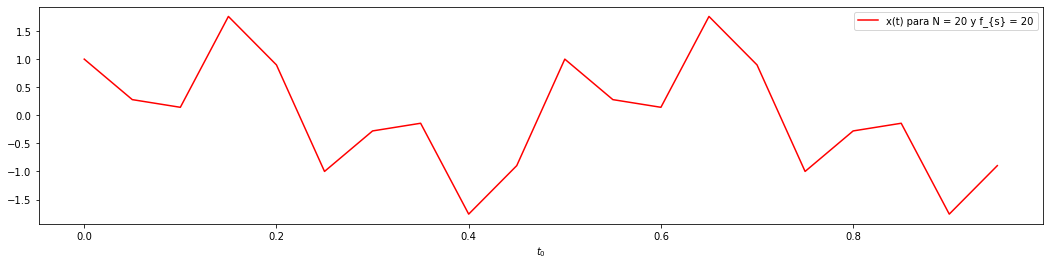

In [4]:
# Definimos fs
fs = 20
# Trazamos el rango por intervalos
tn = np.arange(0, 1, 1/fs)

# Definimos la señal
xn = x(tn)
# Graficamos

fig, ax = plt.subplots(1, figsize = (18, 4))
ax.plot(tn, xn, 'r-', label = 'x(t) para N = 20 y f_{s} = 20')
ax.legend()
ax.set_xlabel('$t_{0}$')

d) Grafique simultáneamente $x_{0}$ y $x_{n}$. Para $x_{n}$, use el estilo de trazado "-o" para ver la posición de muestras.

Text(0.5, 0, '$t_{0}$')

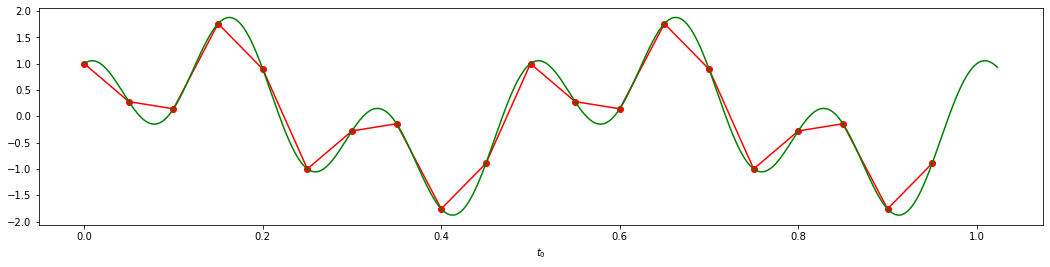

In [5]:
# Graficamos 2 en simultáneo
fig, ax = plt.subplots(1, figsize = (18, 4))
ax.plot(tn, xn, 'r-o', label = 'x(t) para N = 20 y $f_{s} = 20$')
ax.plot(t0, x0, 'g-', label =  'x(t) con N = 1024 y $f_{s_{0}} = 1000$')
ax.set_xlabel('$t_{0}$')

1.2 Reconstrucción de señales
---

a) ¿Cuál es la frecuencia de muestreo necesaria $f_{s}$ para garantizar que la señal $x(t)$ pueda reconstruirse?

*Respuesta*

Para obtener estos resultados, recordemos el teorema de Nyquist-Shannon, el cual dice lo siguiente:

Sea f una señal cuya transformada de Fourier tiene *soporte compacto* dentro de $[- \frac{\pi}{T}, \frac{\pi}{T}]$. Etnonces, f puede ser *reconstruida* interpolando sus muestras a distancia T:

$$f(t) = \sum_{n \in X} f(nT)\cdot h_{T}(t - nT)$$


Donde, $\quad$ $\quad$ $h_{T}(t) = sinc(\frac{\pi}{T}\cdot t) = \frac{sin(\frac{\pi}{T} \cdot t)}{\frac{\pi}{T} \cdot t}$

Este teorema debe ser aplicado en la transformada de Fourier de la señal obtenida, por lo tanto debemos primero calcular ésta. Así, considerando que:

$$ \hat{x}(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}x(t)e^{-i\omega t}dt \quad \wedge \quad \delta(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{i\omega t}dt$$

Se tiene que:

$$ \hat{x}(\omega) = \frac{1}{2}[i(\delta (\omega - 4\pi) - \delta ( \omega + 4\pi)) + ( \delta (\omega + 12\pi) + \delta (\omega - 12\pi))] $$

Así, el teorema nos ayuda a decifrar el soporte compacto, donde $\frac{\pi}{T} = \pi \cdot f_{s} = 12\pi$, por lo tanto, $f_{s} = 12Hz$. 


b) Programe una función def recSinc $(x_{s}, t_{s}, f_{s}, t)$ que reconstruya una señal en el tiempo t a partir de muestras $x_{s}, t_{s}$ a la frecuencia $f_{s}$.

In [6]:
#Comenzamos definiendo una función en base a la expresión dada anteriormente en el teorema.
# En particular, el tiempo debe ser variable por lo que incorporamos un for para hacer correr un i que ayude a variar la parte temporal de la expresión.
def recSinc(xs, ts, fs, t):
    rec = []
    for i in t:
        np.array(rec.append(np.sum(xs*np.sinc(np.pi*fs*(i - ts)))))
    return rec

c) Grafique simultáneamente $x_{0}$ y la interpolación de $x_{n}$ en $t_{0}$. ¿Qué pasa en el borde de la ventana de muestreo?

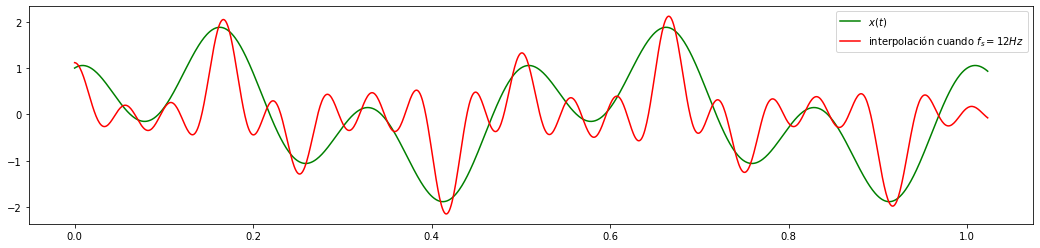

In [7]:
#Comenzamos definiendo las variables ingresadas en recSinc

fs = 12 #frecuencia obtenida gracias al teorema anterior.
ts = np.arange(0, 1, 1/fs)
xs = x(ts)

fig, ax = plt.subplots (1, figsize = (18, 4))

ax.plot(t0, x0, 'g-', label = '$x(t)$')
ax.plot(t0, recSinc(xs, ts, fs, t0), 'r-', label = 'interpolación cuando $f_{s} = 12Hz$')
ax. legend()

d) Modifique la frecuencia de muestreo de $f_{s} = 20$ a $f_{s} = 10$. ¿Qué sucede con la reconstrucción?

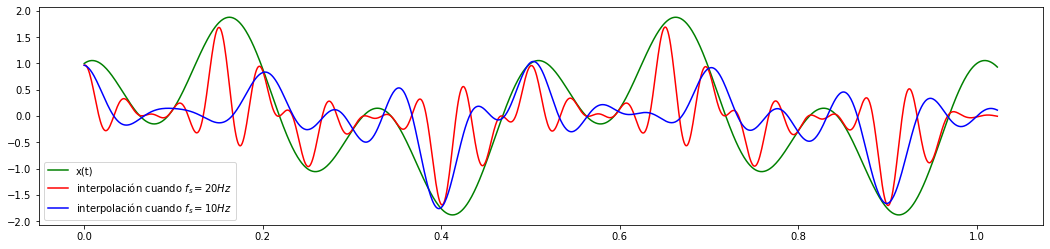

In [8]:
#repetimos el mismo procedimiento anterior

f20 = 20
t20 = np.arange(0, 1, 1/f20)
x20 = x(t20)

f10 = 10
t10 = np.arange(0, 1, 1/f10)
x10 = x(t10)

fig, ax = plt. subplots (1, figsize = (18, 4))

ax.plot(t0, x0, 'g-', label = 'x(t)')
ax.plot(t0, recSinc(x20, t20, f20, t0), 'r-', label = 'interpolación cuando $f_{s} = 20Hz$')
ax.plot(t0, recSinc(x10, t10, f10, t0), 'b-', label = 'interpolación cuando $f_{s} = 10Hz$')
ax.legend()


Como conclusión a la gráfica presentada anteriormente, podemos decir que la interpolación cuando $f_{s} = 20Hz$ es más representativa que cuando $f_{s} = 10Hz$.

1.3 Generación de señales de audio
---

En esta parte trabajaremos con secuencias de audio. Para hacer eso usaremos scipy.io.wavfile para cargar y guardar archivos en formato $.wav$. También es posible escuchar audio directamente en Python usando librería de manipulación de audio *sounddevice* que se puede instalar con *pip* o *conda*. En esta sección las señales generadas solo serán escuchadas y trazadas, pero estudiaremos sus componentes de frecuencia en la siguiente sección.

a) Genere 1 segundo de una onda sinusoidal de magnitud 0.5 y de frecuencia $f_{0} = 425Hz$ muestreada a $f_{s} = 8000Hz$. Guárdelo como un archivo *wave* y escuche el archivo o escuche directamente la señal desde Python. Este es el tono de marcado de los teléfonos europeos.

In [9]:
# Comenzamos definiendo lo que se quiere reproducir mediante una función
def nota (a, f, t):
    return a*np.sin(2*np.pi*f*t)

tw = np.arange(0, 1, 1/fs)
a = 0.5
f0 = 425
fs = 8000

sonido = nota(a, f = f0, t = tw)

#guardamos el archivo

wav.write(filename = 'sonido.wav', rate = 8000, data = sonido)

#reproducimos
sd.play(sonido, fs)
sd.wait()


b) Es posible generar notas musicales a partir de su número MIDI m donde la frecuencia se expresa como:

$$ f_{m} = 440 \cdot 2^{\frac{m-69}{12}} $$

Vemos que hay 12 semitonos para pasar de una nota a su octava.

La nota MIDI $m = 69$ es la *LA* 4 en notación y es el estándar de tono utilizada para afinar instrumentos para conciertos.

La lista de notas y sus correspondientes nombres y frecuencias puede encontrarse en línea.

Implemente una función *def getNote* (m, $f_{s}$, 1) que devuelve la nota m tocada durante 1 segundo a la frecuencia $f_{s}$

In [10]:
def getNote (m, fs, l):
    t = np.arange(0, 1, 1/fs)
    f = 440 * 2^np.int32((m-69)/12)
    return nota(a=0.5, f=f, t=t)

c) Guarde la nota m = 69 en un archivo llamado "A4.wav". Escuche varias otras notas MIDI. ¿Qué pasa para m = 117 (LA8) cuando se guarda a la frecuencia de muestreo $f_{s} = 8000Hz$?

In [11]:
#Guardamos la nota m = 69.
wav.write(filename = 'A4.wav', rate = 8000, data = getNote(69, 16000, l = 2))
wav.write(filename = 'LA8.wav', rate = 8000, data = getNote(117, 8000, l = 2))

d) Codifique una secuencia de concatenación de notas [70, 72, 68, 56, 63] (1 segundo cada una) y guarde la secuencia como archivo "seq.wav". ¿Le suena la secuencia?

In [15]:
wav.write(filename = 'seq.wav', rate = 8000, data = np.concatenate([getNote(m, 44100, l = 27) for m in [70, 72, 68, 56, 63]]))

f) Genere la señal:

$$ x(t) = sin(2\pi (\omega_{0}t + \frac{c}{2}t^{2})) $$

Con $f_{0} = 100Hz$ y $ c = 500$ durante 1 segundo a una frecuencia de muestreo de $f_{s} = 8000Hz$. Esta señal se llama "chirp" y corresponde a una modulación de frecuencia. Guarde la señal en el archivo "chirp.wav"

In [ ]:
#Comenzamos definiendo las constantes dadas
f0 = 100
c = 500
fs = 8000
#fijamos los rangos
t = np.arange(0, 1, 1/fs)
# definimos la función 
xt = np.sin(2*np.pi*(f0*t+c/2*t**2))
#definimos el chirp
wav.write(filename = 'chirp.wav', rate = 8000, data = xt)
